In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from slugify import slugify

In [10]:
all_runs = pd.read_csv('data.csv')
all_runs.dropna(inplace=True)
all_runs.head()

,dungeon,key_level,affixes,tank,heal,dps1,dps2,dps3,region,score
0,Atal'dazar,25,fortified-bolstering-skittish-awakened,Brewmaster Monk,Restoration Druid,Outlaw Rogue,Havoc Demon Hunter,Fire Mage,eu,421.023981
1,Atal'dazar,25,fortified-bolstering-skittish-awakened,Brewmaster Monk,Restoration Druid,Outlaw Rogue,Havoc Demon Hunter,Fire Mage,eu,420.043337
2,Atal'dazar,25,fortified-bolstering-skittish-awakened,Brewmaster Monk,Discipline Priest,Beast Mastery Hunter,Outlaw Rogue,Havoc Demon Hunter,eu,419.476527
3,Atal'dazar,25,fortified-bolstering-skittish-awakened,Protection Warrior,Restoration Druid,Enhancement Shaman,Outlaw Rogue,Havoc Demon Hunter,eu,418.927921
4,Atal'dazar,24,fortified-bolstering-skittish-awakened,Protection Warrior,Restoration Druid,Outlaw Rogue,Havoc Demon Hunter,Fire Mage,eu,383.782964


In [21]:
specs = dict()
specs['death-knight'] = ['blood', 'frost', 'unholy']
specs['demon-hunter'] = ['havoc', 'vengeance']
specs['druid'] = ['balance', 'feral', 'guardian', 'restoration']
specs['hunter'] = ['beast-mastery', 'marksmanship', 'survival']
specs['mage'] = ['arcane', 'fire', 'frost']
specs['monk'] = ['brewmaster', 'windwalker', 'mistweaver']
specs['paladin'] = ['holy', 'protection', 'retribution']
specs['priest'] = ['discipline', 'holy', 'shadow']
specs['rogue'] = ['assassination', 'outlaw']
specs['shaman'] = ['elemental', 'enhancement', 'restoration']
specs['warlock'] = ['affliction', 'demonology', 'destruction']
specs['warrior'] = ['arms', 'fury', 'protection']

classes = ['Mage', 'Druid', 'Demon Hunter', 'Monk', 'Warlock', 'Paladin', 'Warrior', 'Priest', 'Rogue', 'Shaman', 'Hunter', 'Death Knight']
all_specs = [u'Frost Mage', u'Balance Druid', u'Restoration Druid', u'Vengeance Demon Hunter', u'Windwalker Monk', u'Destruction Warlock', u'Holy Paladin', u'Arms Warrior', u'Brewmaster Monk', u'Retribution Paladin', u'Discipline Priest', u'Outlaw Rogue', u'Restoration Shaman', u'Blood Death Knight', u'Havoc Demon Hunter', u'Guardian Druid', u'Subtlety Rogue', u'Beast Mastery Hunter', u'Mistweaver Monk', u'Protection Paladin', u'Affliction Warlock', u'Enhancement Shaman', u'Shadow Priest', u'Survival Hunter', u'Assassination Rogue', u'Frost Death Knight', u'Elemental Shaman', u'Fury Warrior', u'Holy Priest', u'Arcane Mage', u'Unholy Death Knight', u'Feral Druid', u'Protection Warrior', u'Demonology Warlock', u'Marksmanship Hunter', u'Fire Mage']

tanks =  [u'Vengeance Demon Hunter',
          u'Brewmaster Monk',
          u'Blood Death Knight',
          u'Guardian Druid',
          u'Protection Paladin',
          u'Protection Warrior']

healers = [u'Restoration Druid',
           u'Holy Paladin',
           u'Discipline Priest',
           u'Restoration Shaman',
           u'Mistweaver Monk',
           u'Holy Priest',]

melee = [u'Windwalker Monk',
         u'Arms Warrior',
         u'Retribution Paladin',
         u'Outlaw Rogue',
         u'Havoc Demon Hunter',
         u'Subtlety Rogue',
         u'Enhancement Shaman',
         u'Survival Hunter',
         u'Assassination Rogue',
         u'Frost Death Knight',
         u'Fury Warrior',
         u'Unholy Death Knight',
         u'Feral Druid',]

ranged = [u'Frost Mage',
          u'Balance Druid',
          u'Destruction Warlock',
          u'Beast Mastery Hunter',
          u'Affliction Warlock',
          u'Shadow Priest',
          u'Elemental Shaman',
          u'Arcane Mage',
          u'Demonology Warlock',
          u'Marksmanship Hunter',
          u'Fire Mage']


dungeon_slugs = ['ataldazar', 'the-underrot',
                'kings-rest', 'temple-of-sethraliss',
                'the-motherlode',
                'freehold',  'tol-dagor',
                'waycrest-manor', 'siege-of-boralus',
                'shrine-of-the-storm',
                'operation-mechagon-junkyard',
                'operation-mechagon-workshop'
                ]


affixes = ["Fortified, Bolstering, Skittish, Awakened",
"Tyrannical, Bursting, Necrotic, Awakened",
"Fortified, Sanguine, Quaking, Awakened",
"Tyrannical, Bolstering, Explosive, Awakened",
"Fortified, Bursting, Volcanic, Awakened",
"Tyrannical, Raging, Necrotic, Awakened",
"Fortified, Teeming, Quaking, Awakened",
"Tyrannical, Bursting, Skittish, Awakened",
"Fortified, Bolstering, Grievous, Awakened",
"Tyrannical, Raging, Explosive, Awakened",
"Fortified, Sanguine, Grievous, Awakened",
"Tyrannical, Teeming, Volcanic, Awakened",
          ]

class_color = dict()
class_color['death-knight'] = '#C41F3B'
class_color['demon-hunter'] = '#A330C9'
class_color['druid'] = '#FF7D0A'
class_color['hunter'] = '#A9D271'
class_color['mage'] = '#40C7EB'
class_color['monk'] = '#00FF96'
class_color['paladin'] = '#F58CBA'
class_color['priest'] = '#FFFFFF'
class_color['rogue'] = '#FFF569'
class_color['shaman'] = '#0070DE'
class_color['warlock'] = '#8787ED'
class_color['warrior'] = '#C79C6E'

In [35]:
def get_class(character):
    for cls in classes:
        if cls in character:
            return cls

In [36]:
plt.rcParams['axes.facecolor'] = '#DDDDDD'

In [40]:
def plot_distribution(counts, role):
    plt.figure(figsize=(12, 8))
    colors = [class_color[slugify(get_class(x))] for x in counts.keys()]
    sns.barplot(x=list(counts.keys()), y=list(counts.values()), palette=colors)
    plt.title('{} distribution'.format(role))
    plt.xticks(rotation=45, ha="right", rotation_mode="anchor")
    plt.show()

In [37]:
dps_count = dict(all_runs['dps1'].value_counts() + all_runs['dps2'].value_counts() + all_runs['dps2'].value_counts())
sorted_dps_count = dict(sorted(dps_count.items(), key=lambda x: get_class(x[0])))

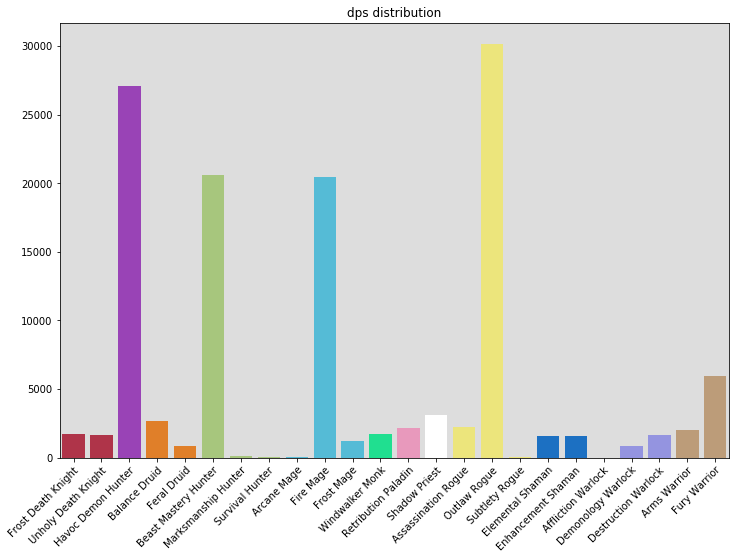

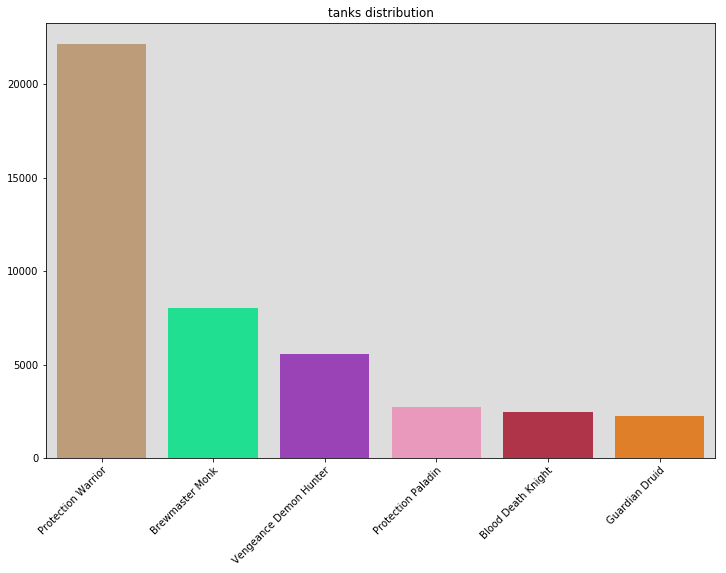

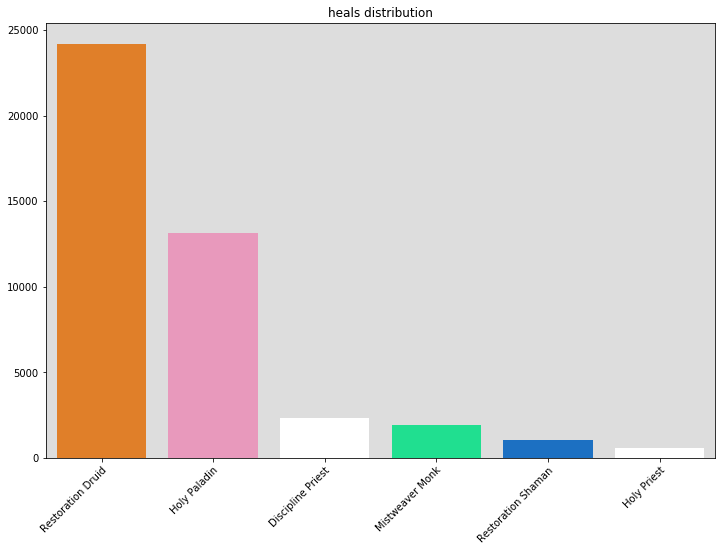

In [46]:
plot_distribution(sorted_dps_count, 'dps')
plot_distribution(dict(all_runs['tank'].value_counts()), 'tanks')
plot_distribution(dict(all_runs['heal'].value_counts()), 'heals')

##### Classes comparison

In [129]:
all_runs.groupby('tank').mean()['score']

tank
Blood Death Knight        295.130832
Brewmaster Monk           316.924489
Guardian Druid            301.321011
Protection Paladin        295.517462
Protection Warrior        328.034778
Vengeance Demon Hunter    301.044687
Name: score, dtype: float64

In [132]:
df = all_runs.groupby('tank').mean()['score']

In [ ]:
all_runs.plot()

In [134]:
df.index

Index(['Blood Death Knight', 'Brewmaster Monk', 'Guardian Druid',
       'Protection Paladin', 'Protection Warrior', 'Vengeance Demon Hunter'],
      dtype='object', name='tank')

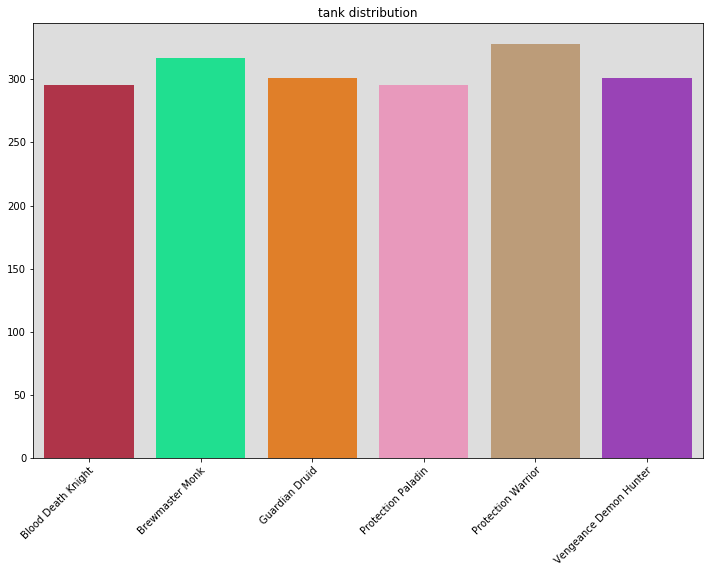

In [142]:
# colors = [class_color[slugify(get_class(x))] for x in df.index]
plot_distribution(dict(all_runs.groupby('tank').mean()['score']), 'tank')

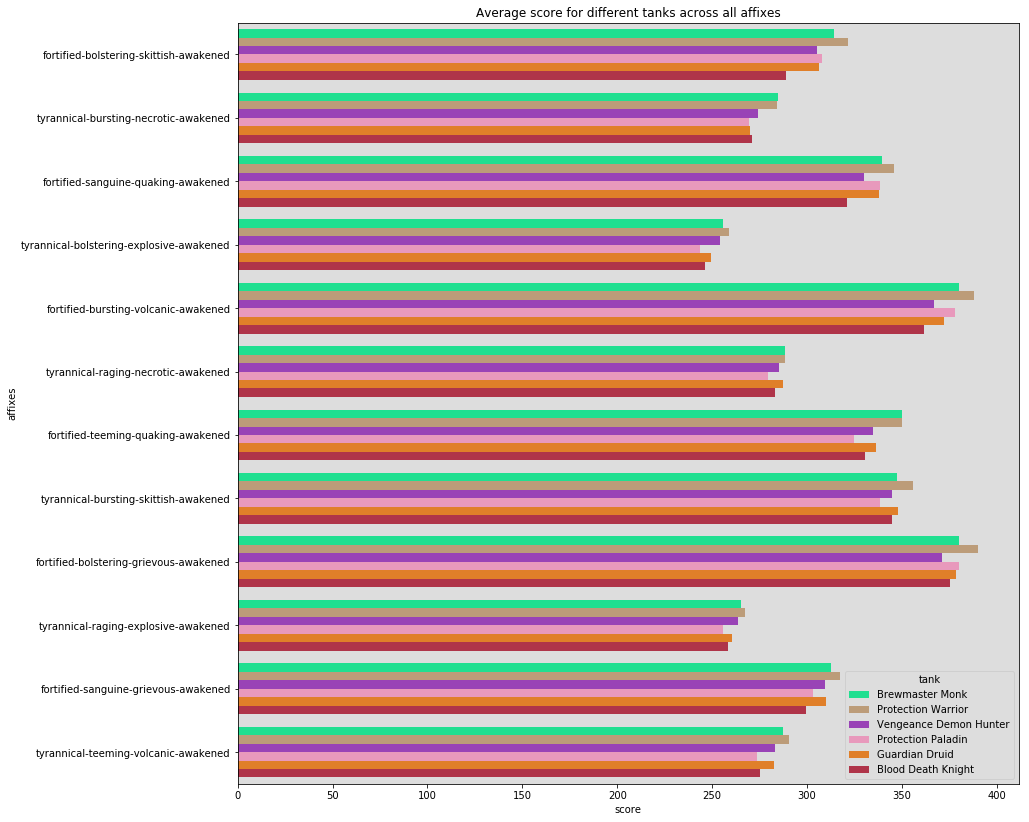

In [174]:
plt.figure(figsize=(14, 14))
colors = [class_color[slugify(get_class(x))] for x in all_runs['tank'].unique()]
sns.barplot(x="score", y="affixes", data=all_runs, hue='tank', estimator=np.mean, errwidth=0, palette=colors)
plt.title('Average score for different tanks across all affixes')
plt.show()

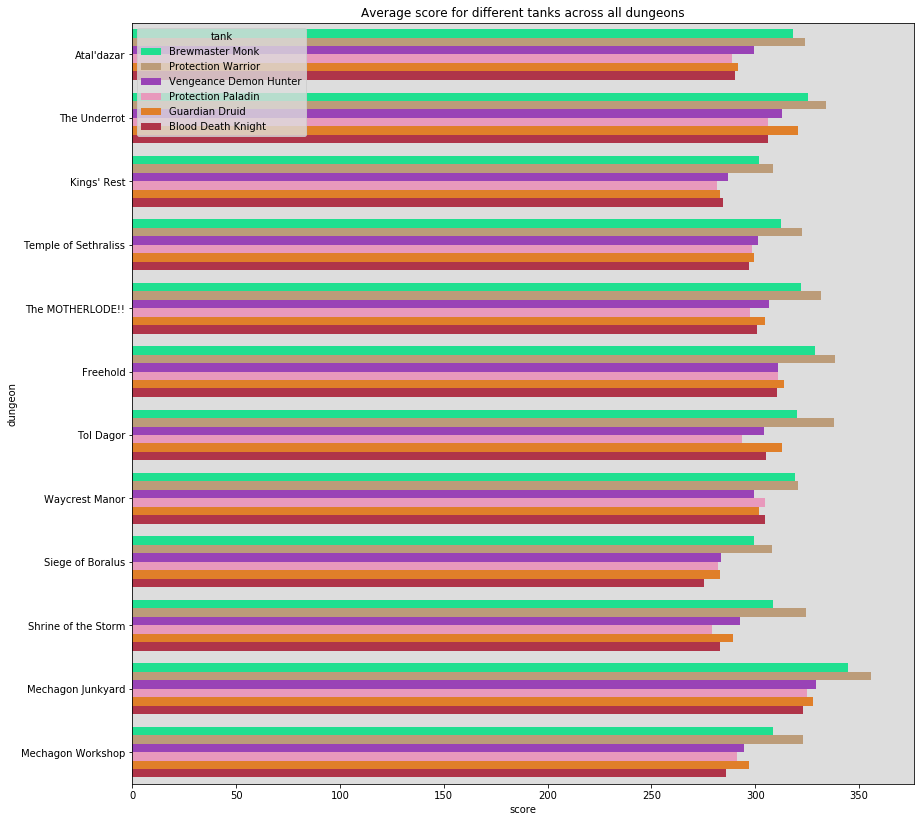

In [176]:
plt.figure(figsize=(14, 14))
colors = [class_color[slugify(get_class(x))] for x in all_runs['tank'].unique()]
sns.barplot(x="score", y="dungeon", data=all_runs, hue='tank', estimator=np.mean, errwidth=0, palette=colors)
plt.title('Average score for different tanks across all dungeons')
plt.show()

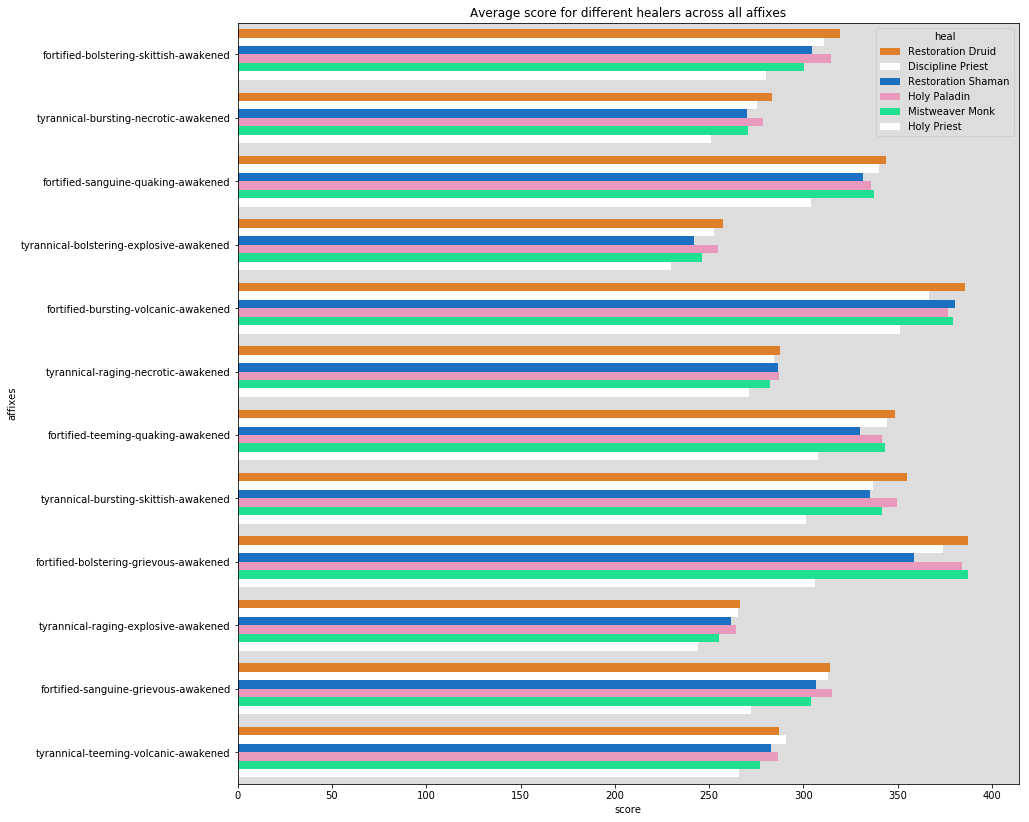

In [200]:
plt.figure(figsize=(14, 14))
colors = [class_color[slugify(get_class(x))] for x in all_runs['heal'].unique()]
sns.barplot(x="score", y="affixes", data=all_runs, hue='heal', estimator=np.mean, errwidth=0, palette=colors)
plt.title('Average score for different healers across all affixes')
plt.show()

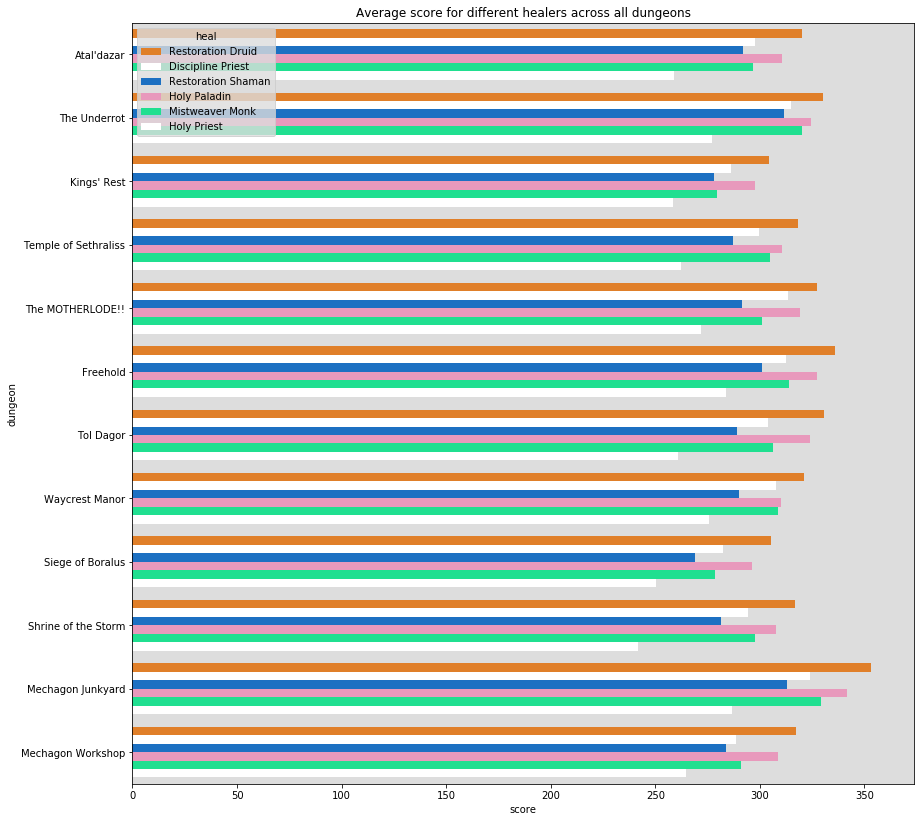

In [177]:
plt.figure(figsize=(14, 14))
colors = [class_color[slugify(get_class(x))] for x in all_runs['heal'].unique()]
sns.barplot(x="score", y="dungeon", data=all_runs, hue='heal', estimator=np.mean, errwidth=0, palette=colors)
plt.title('Average score for different healers across all dungeons')
plt.show()

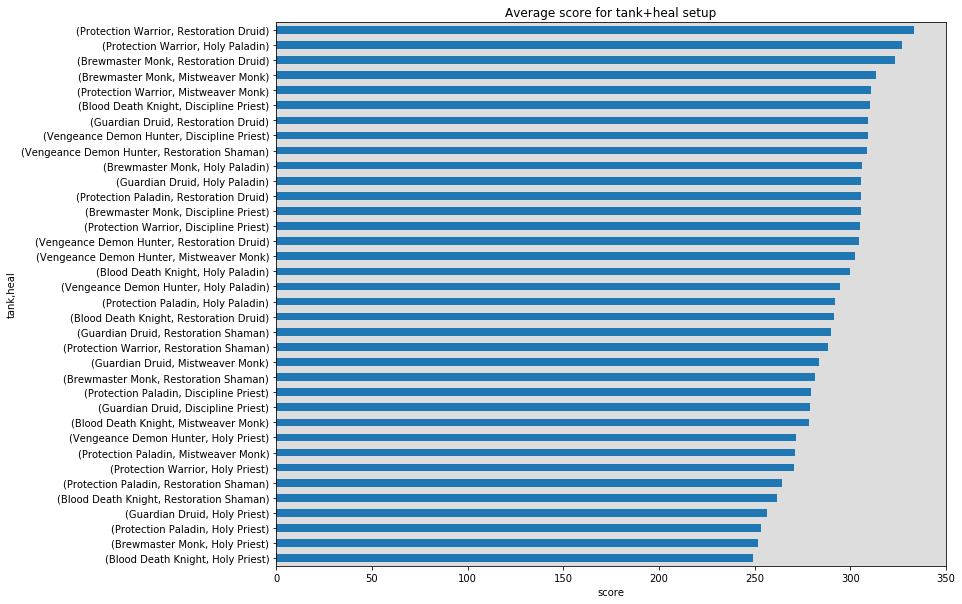

In [199]:
plt.figure(figsize=(12, 10))
all_runs.groupby(['tank', 'heal']).mean()['score'].sort_values(ascending=True).plot(kind='barh')
plt.title('Average score for tank+heal setup')
plt.xlabel('score')
plt.show()

#### Difference between tyrannical and fortified

In [47]:
fortified_runs = all_runs[all_runs['affixes'].str.startswith('fortified')]
tyrannical_runs = all_runs[all_runs['affixes'].str.startswith('tyrannical')]

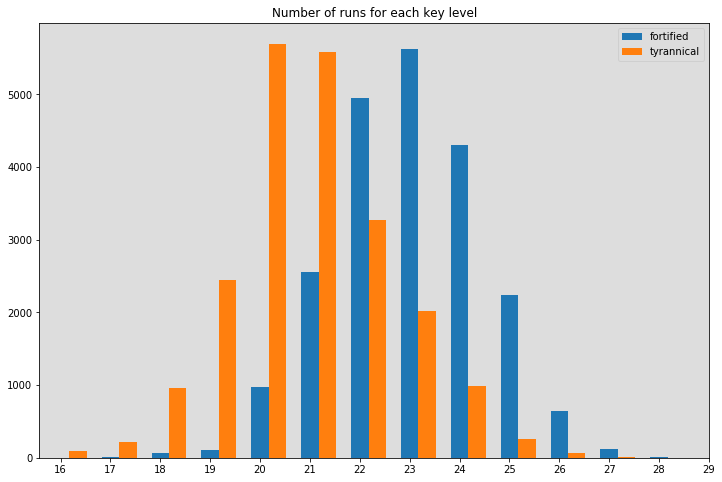

In [49]:
bar_width = 0.35
fig, ax = plt.subplots(figsize=(12, 8))
fort = ax.bar(fortified_runs['key_level'].value_counts().sort_index(ascending=False).index, 
              fortified_runs['key_level'].value_counts().sort_index(ascending=False).values, 
              bar_width, label='fortified')
tyr = ax.bar(tyrannical_runs['key_level'].value_counts().sort_index(ascending=False).index+bar_width, 
             tyrannical_runs['key_level'].value_counts().sort_index(ascending=False).values,
             bar_width, label='tyrannical')
plt.title('Number of runs for each key level')
plt.xticks(range(16, 30))
plt.legend()
plt.show()

In [50]:
all_runs['tyrannical/fortified'] = all_runs.apply(lambda x: 'tyrannical' if x['affixes'].startswith('tyrannical') else 'fortified', axis=1)

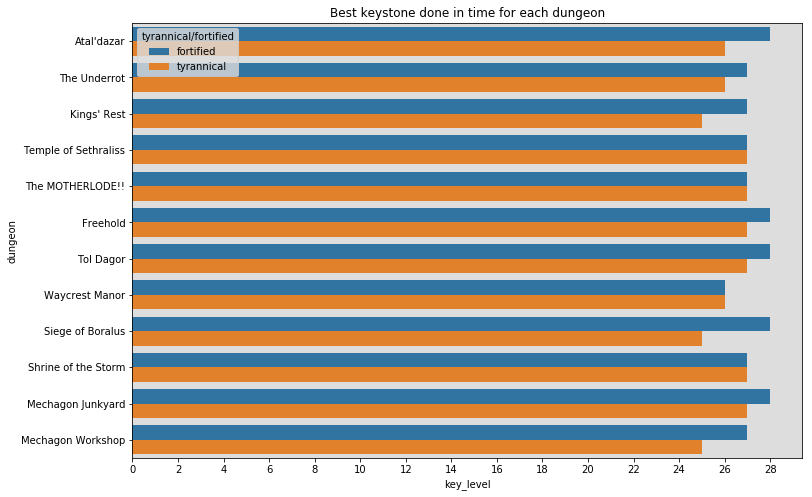

In [51]:
plt.figure(figsize=(12, 8))
sns.barplot(x="key_level", y="dungeon", data=all_runs, hue='tyrannical/fortified', estimator=max, errwidth=0)
plt.xticks(range(0, 30, 2))
plt.title('Best keystone done in time for each dungeon')
plt.show()

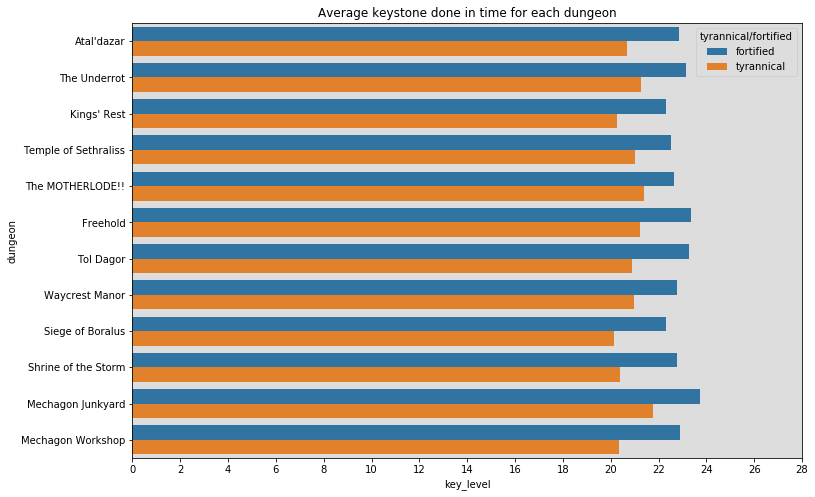

In [52]:
plt.figure(figsize=(12, 8))
sns.barplot(x="key_level", y="dungeon", data=all_runs, hue='tyrannical/fortified', estimator=np.mean, errwidth=0)
plt.xticks(range(0, 30, 2))
plt.title('Average keystone done in time for each dungeon')
plt.show()

Difference in best keystone done is not so huge, but average keystone is much higher on fortified 

#### Affixes comparison

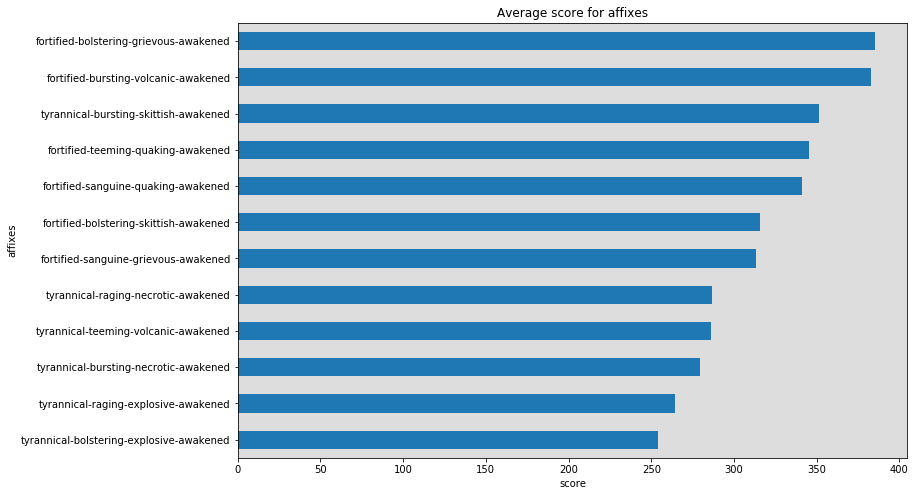

In [201]:
plt.figure(figsize=(12, 8))
all_runs.groupby(['affixes']).mean()['score'].sort_values().plot(kind='barh')
plt.title('Average score for affixes')
plt.xlabel('score')
plt.show()

In [95]:
dungeons = all_runs['dungeon'].unique()

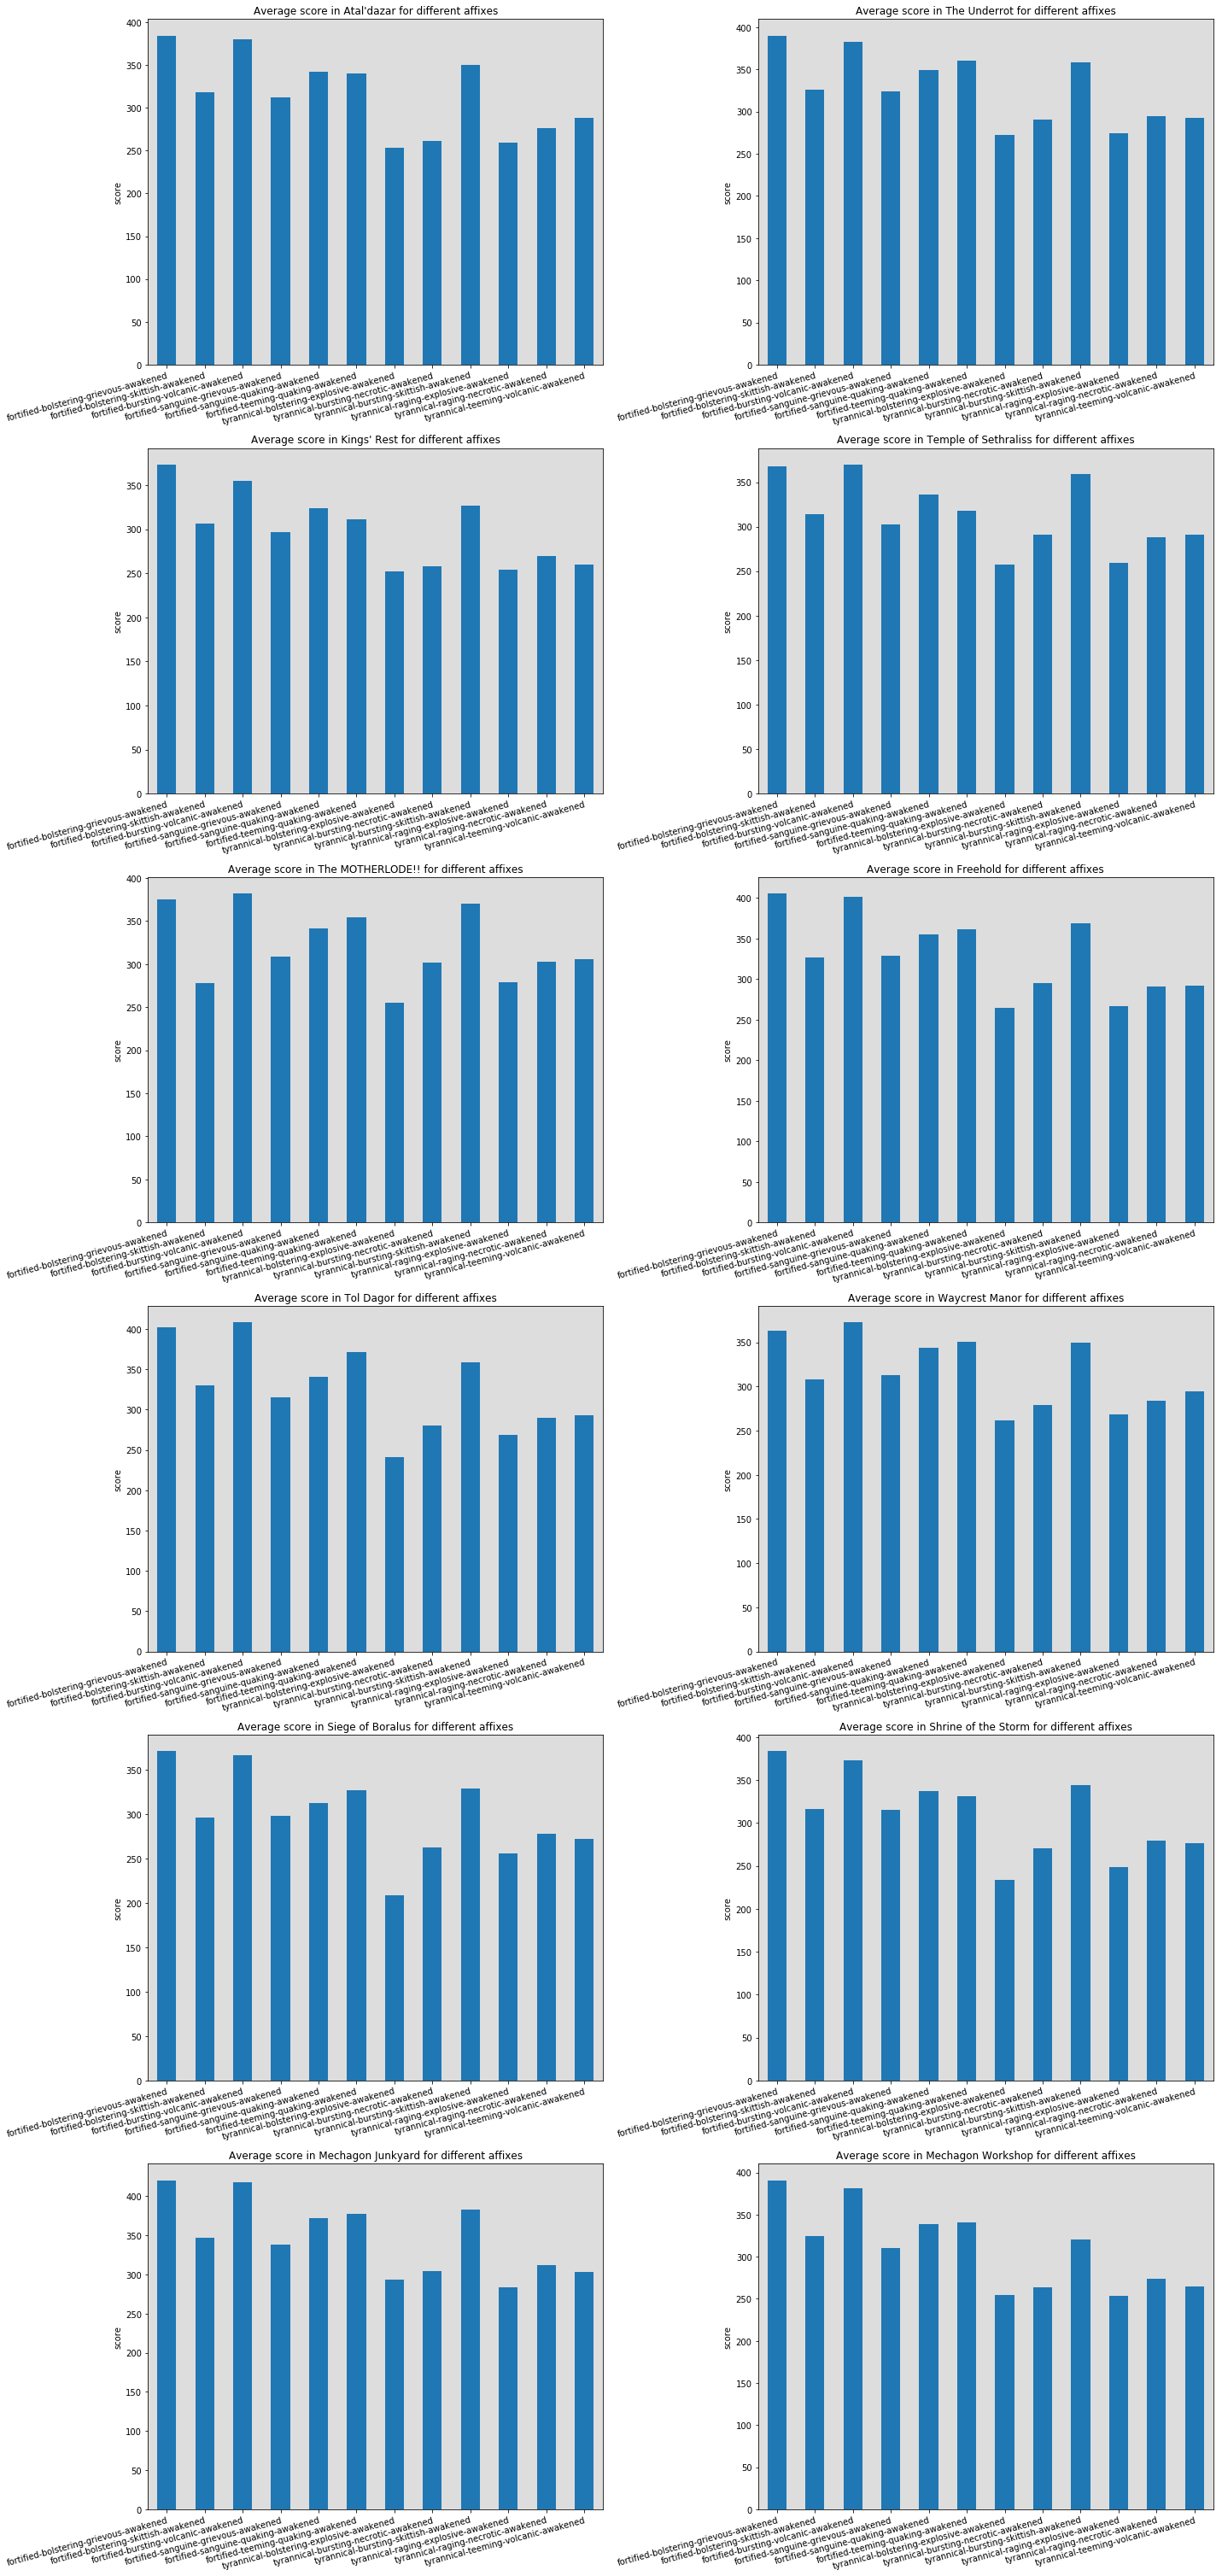

In [212]:
fig = plt.figure(figsize=(20, 42))

for i, dungeon in enumerate(dungeons):
    plt.subplot(6, 2, i + 1)
    all_runs[all_runs['dungeon']==dungeon].groupby('affixes').mean()['score'].plot(kind='bar')
    plt.xticks(rotation=15, ha="right", rotation_mode="anchor")
    plt.title('Average score in {} for different affixes'.format(dungeon))
    plt.ylabel('score')
    plt.xlabel('')
fig.tight_layout()
plt.show()